In [1]:
from pydub import AudioSegment
from matplotlib import pyplot as plt
import numpy as np
from pydub.playback import play
import audiosegment
import sounddevice as sd

In [2]:
sound = AudioSegment.from_mp3("samples/snare.mp3")
sound_raw = sound.get_array_of_samples()

size_sound_raw = len(sound_raw)
print("sound_raw size: "+ str(size_sound_raw))

sample_rate = sound.frame_rate
print("The sample rate is: "+str(sample_rate))

print("Durantion of sound: "+str(size_sound_raw/sample_rate))

sound_raw size: 14645
The sample rate is: 22050
Durantion of sound: 0.664172335600907


# Test 1
Multiplying the signal in time domain by a decreasing exponential term

In [3]:
t = np.linspace(0, size_sound_raw, size_sound_raw)
factor = -50
exp_factor = np.exp(factor*(t/sample_rate))
new_sound = sound_raw * exp_factor

exp_factor[0:10]

array([1.        , 0.99773484, 0.99547481, 0.9932199 , 0.9909701 ,
       0.9887254 , 0.98648578, 0.98425123, 0.98202174, 0.97979731])

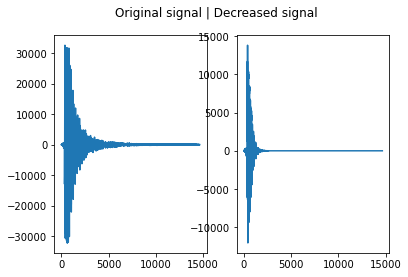

In [4]:
plt.subplot(121)
plt.plot(sound_raw)
plt.subplot(122)
plt.plot(new_sound)

plt.suptitle("Original signal | Decreased signal")
plt.show()

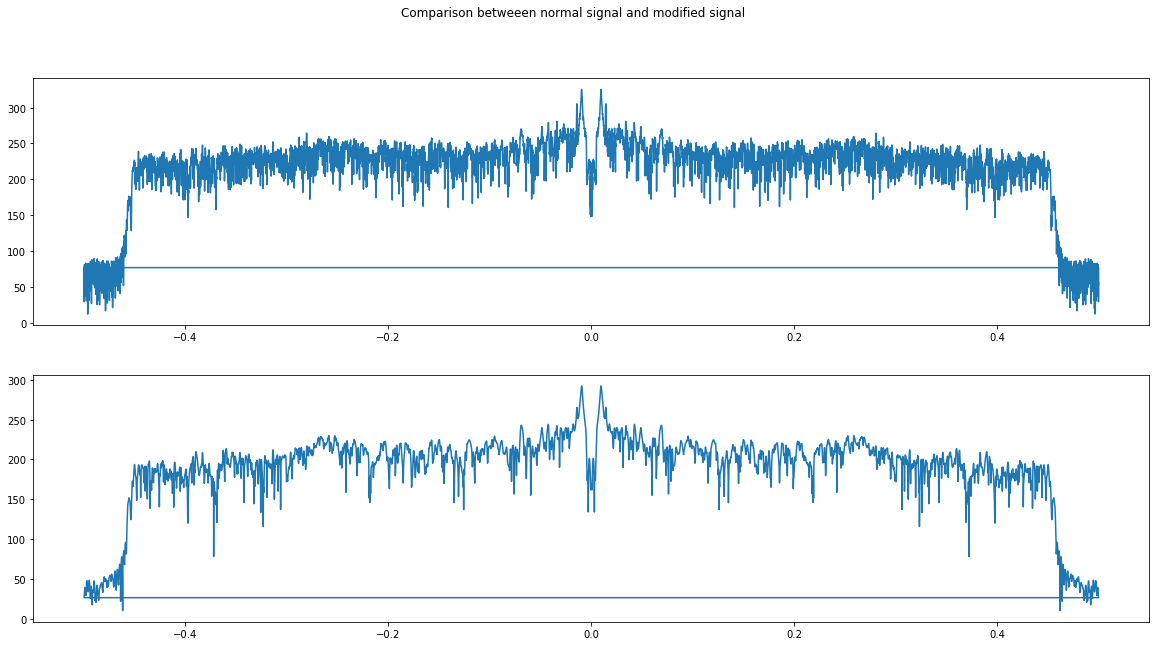

In [5]:
time_percentage = 1
upper_limit = round(size_sound_raw*time_percentage)

fourier_sound_raw = np.fft.fft(sound_raw, upper_limit)
magnitude_fourier_db = 20*np.log(np.abs(fourier_sound_raw))
freq = np.fft.fftfreq(upper_limit)
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(freq, magnitude_fourier_db)

fourier_new_sound = np.fft.fft(new_sound, upper_limit)
new_magnitude_fourier_db = 20*np.log(np.abs(fourier_new_sound))
freq = np.fft.fftfreq(upper_limit)
plt.subplot(2,1,2)
plt.plot(freq, new_magnitude_fourier_db)
plt.suptitle("Comparison betweeen normal signal and modified signal")
plt.show()

C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


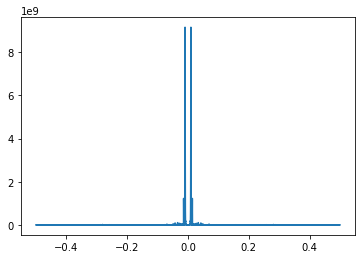

In [6]:
PSD_original_sound = fourier_sound_raw * np.conj(fourier_sound_raw)/upper_limit
plt.plot(freq,PSD_original_sound)

# Result - Test 1
The sound produced by the multiplication in time domain seems distorted and unpleasant

In [7]:
sd.play(new_sound, sample_rate)

# Test 2
Decreasing the original signal fourier transformation by a constant factor in all frequency domain, and taking the inverse transformation

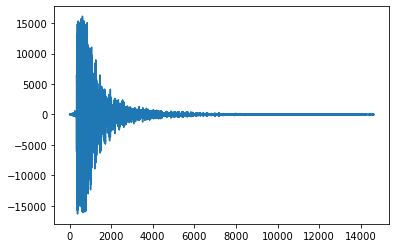

In [8]:
new_fourier_signal = fourier_sound_raw * 0.5
new_signal = np.fft.ifft(new_fourier_signal)

signal_result = np.abs(new_signal)
signal_result[np.angle(new_signal) < 0] = signal_result[np.angle(new_signal) < 0]*-1

plt.plot(signal_result)

# Result - Test2
Unpleasant sound

In [9]:
sd.play(signal_result, sample_rate)

C:\Users\andre\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


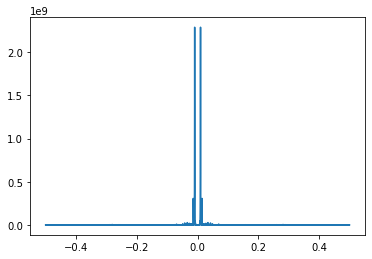

In [10]:
PSD_freq_modified_sound = new_fourier_signal * np.conj(new_fourier_signal)/upper_limit
plt.plot(freq, PSD_freq_modified_sound)